In [2]:
!pip install tensorflow  
!pip install -U scikit-learn
!pip install pandas
!pip install matplotlib

In [3]:
import os # to work with different file paths
import pandas as pd # to read tabular data 
import tensorflow as tf # deep learning framework
import numpy as np 

C:\Users\manjh\AppData\Local\Temp\ipykernel_5172\1371178334.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # to read tabular data


In [4]:
df = pd.read_csv(os.path.join(r'C:\Users\manjh\Downloads\archive\train.csv')) # os.path.join -> gives full file path 

In [5]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
df.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [7]:
df.iloc[0]

id                                                0000997932d777bf
comment_text     Explanation\nWhy the edits made under my usern...
toxic                                                            0
severe_toxic                                                     0
obscene                                                          0
threat                                                           0
insult                                                           0
identity_hate                                                    0
Name: 0, dtype: object

In [8]:
df.iloc[0]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [9]:
# ***** 1.PREPROCESS -: *****
!pip list

Package                      Version
---------------------------- ---------------
absl-py                      2.1.0
aiofiles                     23.2.1
altair                       5.2.0
annotated-types              0.6.0
anyio                        4.2.0
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.2.0
Babel                        2.14.0
beautifulsoup4               4.12.3
bleach                       6.1.0
cachetools                   5.3.2
certifi                      2023.11.17
cffi                         1.16.0
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
comm                         0.2.1
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5

In [10]:
from tensorflow.keras.layers import TextVectorization # TextVectorization layer to tokenize our text

In [11]:
 # TextVectorization  is a preprocessing layer which maps text features to integer sequences

In [12]:
# splitting our dataset into comments and features(labels)
X = df['comment_text']
y = df[df.columns[2:]].values # df.columns[2:] --> slicing ; .values --> to convert it into numpy array, this gives us a file format that we can actually pass through our tensorflow deep learning model

In [13]:
# each comment now has a vector which represents whether or not it falls into one of these categories or not
df[df.columns[2:]].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [14]:
MAX_FEATURES = 200000 # number of words in our dictionary, so inside our text vectorization layer we can specify how many words we want to store

In [15]:
# intializing our textVectorization layer
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')
# output_sequence_length --> specifies what is the max length (in tokens) of our sentences going to be


In [16]:
# teaching our vectorizer our vocabulary
vectorizer.adapt(X.values) # adapt ll learn all the words that are inside of our dictionary

In [17]:
vectorized_text = vectorizer(X.values) # going through each and every word and tokenizing it

In [18]:
vectorizer('Hello Alice , Life has been great' )[:6]

<tf.Tensor: shape=(6,), dtype=int64, numpy=array([ 288, 8293,  306,   43,   58,  275], dtype=int64)>

In [19]:
vectorized_text # 159571 is the max no of examples i.e len(x) and 1800 (max no of words)  max output_sequence_length

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]], dtype=int64)>

In [20]:
# creating a tensorflow data pipeline
#MCSBP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps  prevent bottlenecks

In [21]:
dataset.as_numpy_iterator().next() # gets one batch as text in its vectorized form and labels

(array([[   48,   100,   260, ...,     0,     0,     0],
        [   28,    26,   188, ...,     0,     0,     0],
        [64998, 64998,    13, ...,     0,     0,     0],
        ...,
        [ 1258,  6201,     8, ...,     0,     0,     0],
        [   49,    70,     6, ...,     0,     0,     0],
        [  140, 16659,    80, ...,     0,     0,     0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [22]:
batch_x,batch_y=dataset.as_numpy_iterator().next()

In [23]:
batch_x.shape # 16 samples and each 1800 max words

(16, 1800)

In [24]:
len(dataset) # 9974 batches, actually data is 9974*16 = 159584

9974

In [25]:
len(dataset)*.7

6981.799999999999

In [26]:
int(len(dataset)*.7)

6981

In [27]:
# create our training (70%), validation(20%) and testing(10%) partions
train = dataset.take(int(len(dataset)*.7)) # takin 70% of the length of our dataset i.e assigning 70% to out training partion
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2)) # .skip--> specifies that we want to skip a particular partion
# as our training partion is 70% of all our data , so first we are going to skip that 70% then we are going to take 20% as our validation partition
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1)) # skipping 90 % as this is training and validation data together

In [28]:
len(val)

1994

In [29]:
train_generator=train.as_numpy_iterator()

In [30]:
train_generator.next() # progresssively steps through our batches
# while training our deep learning model ll pass through a batch , do a forward pass, a backward pass , go and update the gradients and then it ll go to the next batch

(array([[   8,   51, 3666, ...,    0,    0,    0],
        [  51, 1451,   21, ...,    0,    0,    0],
        [ 760,    2, 3844, ...,    0,    0,    0],
        ...,
        [   2,   37,  344, ...,    0,    0,    0],
        [  46,  664,  150, ...,    0,    0,    0],
        [ 116,   38,    9, ...,    0,    0,    0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [31]:
# ***** 2. CREATE SEQUENTIAL MODEL-: *****
# building our deep learning model
# the first layer in the model is the embedding layer, during training it may learn what words are positive,negative or might be subjective or objective 
# embedding layer--> almost like a personality test for a word, it ll tell us all about that word which makes it useful for deep learning
from tensorflow.keras.models import Sequential # using sequential api for deep learning
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding # importing layers that ll be needed to build our deep learning model
# starting with LSTM layers
# Bidirectional layers is going to be our modifier & is going to allow us to pass the features or values from our LSTM o/p across the board as we r passing through our sequences
# dropout is a method of regularization
# dense layer is fully connected layer
# we don't need to pass through a pre existing embedding our deep learning neural network is going to learn all of the features that it needs inside of that particular embedding 

In [32]:
model = Sequential() # instantiate our model

# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32)) 
# MAX_FEATURES+1-->we are passing through how many words that many different embeddings ll be required i.e one embedding per word and our embeddings ll be 2000001 in length & 32 values in long
#32--> features we are going to have in that embedding

# Bidirectional LSTM Layer
# LSTM layer is going to have 32 different LSTM units
# specify an activation of tanh--> as GPU acceleration that is req for an lstm layout needs to be tanh (dictated by tensorflow)
# Bidirectional --> allows us to pass info backwards & forwards across our LSTM layers ex> " I don't hate u" , bidirectional is useful for sentences coz words prior to a current word ll still have meaning, might even modify the meaning  
# if our neural network is looking at it purely from left to right, it might see hate as the last value and interpret that as a negative statement but coz "don't" is the prev modifier that modifies the o/p meaning thus imaplementing bidirectional is helpful specially when implementing NLP  
model.add(Bidirectional(LSTM(32, activation='tanh')))

# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu')) # final dense layer with 128 units & an activation of 'relu'

# Final layer 
model.add(Dense(6, activation='sigmoid')) # o/p is going to be btw 0 & 1 as we are using sigmoid activation fn

In [33]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [35]:
# training
# Each epoch represents one pass through the entire training dataset.
# here we are going through the total dataset 1 time as epochs=1
history = model.fit(train, epochs=2, validation_data=val)

Epoch 1/2
6981/6981 [==============================] - 9518s 1s/step - loss: 0.0622 - val_loss: 0.0464
Epoch 2/2
6981/6981 [==============================] - 5013s 718ms/step - loss: 0.0466 - val_loss: 0.0402


In [36]:
history.history

{'loss': [0.06218482553958893, 0.04657696187496185],
 'val_loss': [0.046413030475378036, 0.040156006813049316]}

In [37]:
from matplotlib import pyplot as plt # to visualize our loss metrics

<Figure size 800x500 with 0 Axes>

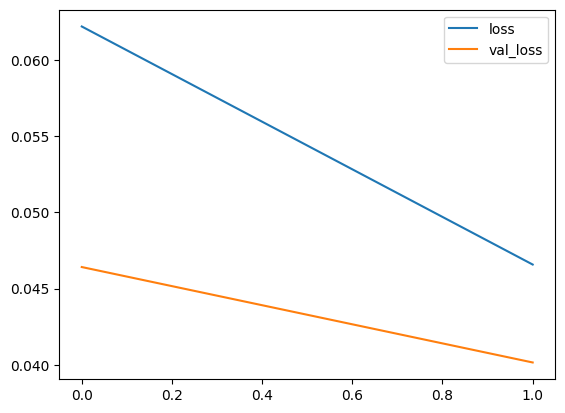

In [38]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [39]:
# ***** MAKE PREDICTIONS-: *****
batch=test.as_numpy_iterator().next()
input_text = vectorizer('I love you')

In [40]:
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([  8, 457,   7, ...,   0,   0,   0], dtype=int64)>

In [41]:
np.expand_dims(input_text,0) # the i/p shape our model is expecting

array([[  8, 457,   7, ...,   0,   0,   0]], dtype=int64)

In [42]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [43]:
model.predict(np.array([input_text])) # model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 1s 1s/step


array([[0.04641377, 0.000152  , 0.00708657, 0.00245063, 0.00801356,
        0.00406767]], dtype=float32)

In [44]:
test.as_numpy_iterator().next()

(array([[     1, 123891,      8, ...,      0,      0,      0],
        [    14,    117,    196, ...,      0,      0,      0],
        [   183,  15487,    121, ...,      0,      0,      0],
        ...,
        [    12,      9,  78189, ...,      0,      0,      0],
        [  3079,   1554,   4464, ...,      0,      0,      0],
        [     8,     65,     49, ...,      0,      0,      0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [45]:
batch_x,batch_y = test.as_numpy_iterator().next()

In [46]:
model.predict(batch_x) # multiple comments being passed at a time

1/1 [==============================] - 0s 124ms/step


array([[6.05640293e-04, 6.31436992e-09, 1.83668053e-05, 2.76409196e-06,
        1.52863904e-05, 8.10868642e-06],
       [6.13266975e-03, 9.53908966e-07, 3.94633360e-04, 7.86938981e-05,
        3.86722240e-04, 1.78298840e-04],
       [3.67829041e-03, 3.38615166e-07, 2.05320277e-04, 3.99856763e-05,
        1.89676924e-04, 9.18575824e-05],
       [6.31830320e-02, 1.15188144e-04, 7.38524273e-03, 1.99384615e-03,
        9.40368790e-03, 3.53066670e-03],
       [6.39875412e-01, 4.83979331e-03, 1.21565536e-01, 1.74107384e-02,
        2.08624780e-01, 3.31631675e-02],
       [6.84362054e-01, 7.44769536e-03, 1.43838227e-01, 2.39417795e-02,
        2.59771347e-01, 4.35347110e-02],
       [6.06371276e-03, 1.22141364e-06, 4.22244339e-04, 9.51433540e-05,
        4.08188440e-04, 2.09474034e-04],
       [1.85114227e-03, 8.07731482e-08, 8.60555374e-05, 1.54570662e-05,
        7.54547218e-05, 3.89982561e-05],
       [1.21703535e-01, 2.82126595e-04, 1.53873246e-02, 3.53805232e-03,
        2.07294468e-02, 

In [47]:
(model.predict(batch_x) > 0.5).astype(int)

1/1 [==============================] - 0s 114ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [48]:
# ***** EVALUATING OUR MODEL-: *****
# since we have multiple binary o/p we can use binary classification metrics like precision and recall
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [49]:
# instantiate each of the metrics
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [50]:
for batch in test.as_numpy_iterator(): # loop through eaach batch inside our data pipeline
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true) # passing our tokenized comments
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat) # making the updates based on the current batch of data
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 123ms/step


In [51]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision: 0.7976521253585815, Recall:0.7712066769599915,Accuracy:0.5065195560455322


In [114]:

# For Fetching Comments 
from googleapiclient.discovery import build


In [115]:

API_KEY = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
 
youtube = build('youtube', 'v3', developerKey=API_KEY) # initializing Youtube API

# Getting the channelId of the video uploader
video_response = youtube.videos().list(
    part='snippet',
    id=video_id
).execute()
 
# Splitting the response for channelID
video_snippet = video_response['items'][0]['snippet']
uploader_channel_id = video_snippet['channelId']

In [116]:
import re

def extract_video_and_channel_ids(youtube_link):
    # Extract video ID from the YouTube link
    video_id_match = re.search(r'(?<=v=)[^&#]+', youtube_link)
    video_id = video_id_match.group() if video_id_match else None

    # Fetch channel ID associated with the video
    video_response = youtube.videos().list(
        part='snippet',
        id=video_id
    ).execute()

    # Extract channel ID from the video response
    video_snippet = video_response['items'][0]['snippet']
    uploader_channel_id = video_snippet['channelId']

    return video_id, uploader_channel_id


In [122]:
# Define a function to fetch comments from YouTube and classify them as toxic or not
def fetch_and_classify_comments(youtube_link):
    # Extract video ID and channel ID from the YouTube link
    video_id, uploader_channel_id = extract_video_and_channel_ids(youtube_link)
    
    # Define a function to check if a comment is toxic
    def is_toxic(comment):
        vectorized_comment = vectorizer([comment])
        results = model.predict(vectorized_comment)
        
        toxic_labels = []
        # Check if any of the 6 labels is true (indicating toxicity)
        for idx, col in enumerate(df.columns[2:]):
            if results[0][idx] > 0.5:
                toxic_labels.append(col)
        
        # If any toxic label is identified, return True
        if toxic_labels:
            return True
        else:
            return False

    # Initialize list to store toxic comments
    toxic_comments = []
    
    # Fetch comments from YouTube
    print("Fetching Comments...")
    nextPageToken = None
    while len(toxic_comments) < 600:
        request = youtube.commentThreads().list(
            part='snippet',
            videoId=video_id,
            maxResults=1000,  # You can fetch up to 1000 comments per request
            pageToken=nextPageToken
        )
        response = request.execute()
        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']
            # Check if the comment is not from the video uploader
            if comment['authorChannelId']['value'] != uploader_channel_id:
                if is_toxic(comment['textDisplay']):
                    toxic_comments.append(comment['textDisplay'])
        nextPageToken = response.get('nextPageToken')
     
        if not nextPageToken:
            break
    
    # Output toxic comments
    return toxic_comments

# Function to take YouTube link from the user and fetch & classify toxic comments
def fetch_and_classify_toxic_comments_from_user_input():
    youtube_link = input("Enter the YouTube video link: ")
    toxic_comments = fetch_and_classify_comments(youtube_link)
    print("Toxic Comments:")
    for idx, comment in enumerate(toxic_comments):
        print(f"Toxic Comment {idx+1}: {comment}")

# Call the function to fetch and classify toxic comments from user input
fetch_and_classify_toxic_comments_from_user_input()




Enter the YouTube video link:  https://www.youtube.com/watch?v=QrmvnZCPGrA


Fetching Comments...
1/1 [==============================] - 0s 194ms/step
Toxic Comments:
Toxic Comment 1: No lying rapist traitor for a dictator
Toxic Comment 2: It is not just old people who have memory lapses!  That’s comment was insulting and really shows ur discrimination against seniors! That sucks!!!
Toxic Comment 3: You are a threat dumbass
Toxic Comment 4: Damn!  Biden STUTTERS!!!!  What in the hell is wrong with you???
Toxic Comment 5: Theres not much more cringy than maga fools forcing a laugh when some maga makes a horrible joke.
Toxic Comment 6: You my dear are an extremely beautiful and highly intelligent woman you deserve a larger platform. 😊
Toxic Comment 7: I&#39;m pretty confused as to why even Yasmin is railing about Bidens&#39; age as though the dude is a walking, ticking, dementia laced time bomb 💣  that can&#39;t be stopped... Even when putting aside the fact that the Dems could put up a goddamn scarecrow, or a plank of wood vaguely shaped like a human on the tick

In [124]:
# fn for interface
def get_toxic_comments(youtube_link):
    toxic_comments = fetch_and_classify_comments(youtube_link)
    return "\n".join(toxic_comments)


In [56]:
# TEST & Interface using Gradio API

In [57]:
!pip install gradio==3.43.1

In [108]:
import tensorflow as tf
import gradio as gr

In [109]:
model.save('toxicityDetection.h5')

C:\Users\manjh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [110]:
model = tf.keras.models.load_model('toxicityDetection.h5')

In [111]:
input_str = vectorizer('I love you, you are sooo inspiring')

In [62]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 1s 654ms/step


In [63]:
res

array([[0.15129979, 0.00087298, 0.02385896, 0.00750589, 0.0326998 ,
        0.01204788]], dtype=float32)

In [126]:
iface = gr.Interface(
    fn=get_toxic_comments,
    inputs="text",
    outputs="text",
    title="YouTube Toxic Comments Extractor",
    description="Enter a YouTube video link to extract and display all the toxic comments on the video.",
)

iface.launch()

Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.


Fetching Comments...
1/1 [==============================] - 0s 194ms/step
